# (Dataset Exploration Title)
## by (fordgobike-tripdata)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import figure
import calendar


%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [4]:
na_counts = df.drop(['member_birth_year', 'member_gender', 'end_station_name', 'end_station_id', 'start_station_name','start_station_id' ], axis=1).isna().sum()
print(na_counts)

duration_sec               0
start_time                 0
end_time                   0
start_station_latitude     0
start_station_longitude    0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
dtype: int64


### What is the structure of your dataset?

> series of records.

### What is/are the main feature(s) of interest in your dataset?

> interested of figuring out when and where are most trips taken, interested in what are the (age, sex, and user_type) of the riders and the duration of the trips in these time points and locations

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration_sec, start_station_name,	end_station_name, member_gender, member_birth_year

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [5]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_month_num'] = df['start_time'].apply(lambda time: time.month)
df['start_month_char'] = df['start_month_num'].apply(lambda x: calendar.month_abbr[x])

In [6]:
print(df['start_month_num'].value_counts())
print(df['start_month_char'].value_counts())

2    183412
Name: start_month_num, dtype: int64
Feb    183412
Name: start_month_char, dtype: int64


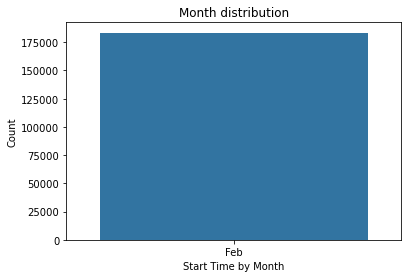

In [7]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='start_month_char', color=base_color)
plt.xlabel('Start Time by Month')
plt.ylabel('Count')
plt.title('Month distribution');

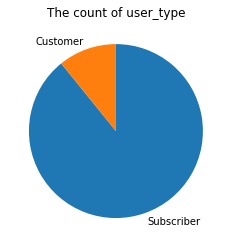

In [8]:
#sb.countplot(data = df, x = 'user_type')
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.title('The count of user_type');

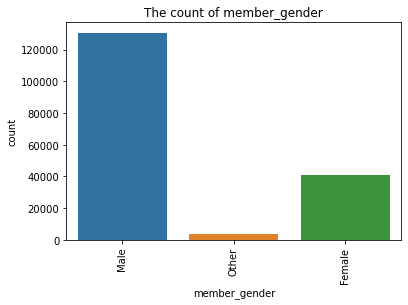

In [9]:
sb.countplot(data = df, x = 'member_gender')
plt.xticks(rotation = 90)
plt.title('The count of member_gender');

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

I surprized to the all trips in only febrauary and I will satistify this.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> yes i need to convert datetime into month 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> yes I did this to visualize suitable figure 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [10]:
numeric_vars = ['age','duration_sec']
times_chr = ['period_day','start_weekday_char','start_month_char']
users_chr = ['user_type','member_gender']
df['age'] = df['member_birth_year'].apply(lambda x: 2017 - x)

Text(0, 0.5, 'bike_id')

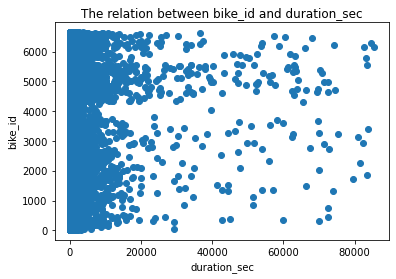

In [12]:
plt.scatter(data = df, x = 'duration_sec', y = 'bike_id');
plt.title('The relation between bike_id and duration_sec');
plt.xlabel('duration_sec')
plt.ylabel('bike_id')

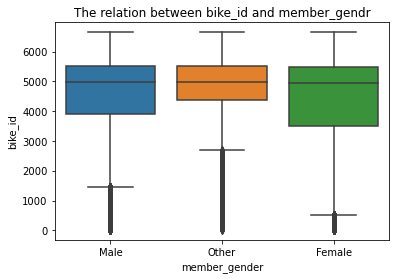

In [13]:
sb.boxplot(data = df, x = 'member_gender', y = 'bike_id' )
plt.title('The relation between bike_id and member_gendr');

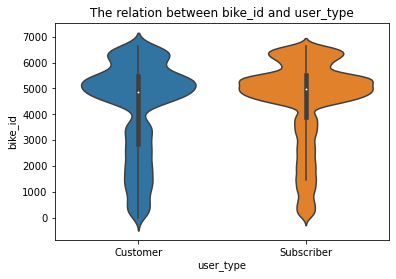

In [14]:
sb.violinplot(data = df, x = 'user_type', y = 'bike_id' )
plt.title('The relation between bike_id and user_type');

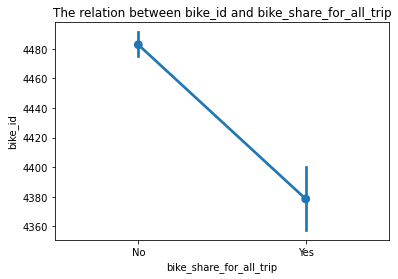

In [15]:
sb.pointplot(data = df, x = 'bike_share_for_all_trip', y = 'bike_id' )
plt.title('The relation between bike_id and bike_share_for_all_trip');

In [16]:
df_cust = df.query('user_type == "Customer"')
df_sub = df.query('user_type == "Subscriber"')


No handles with labels found to put in legend.


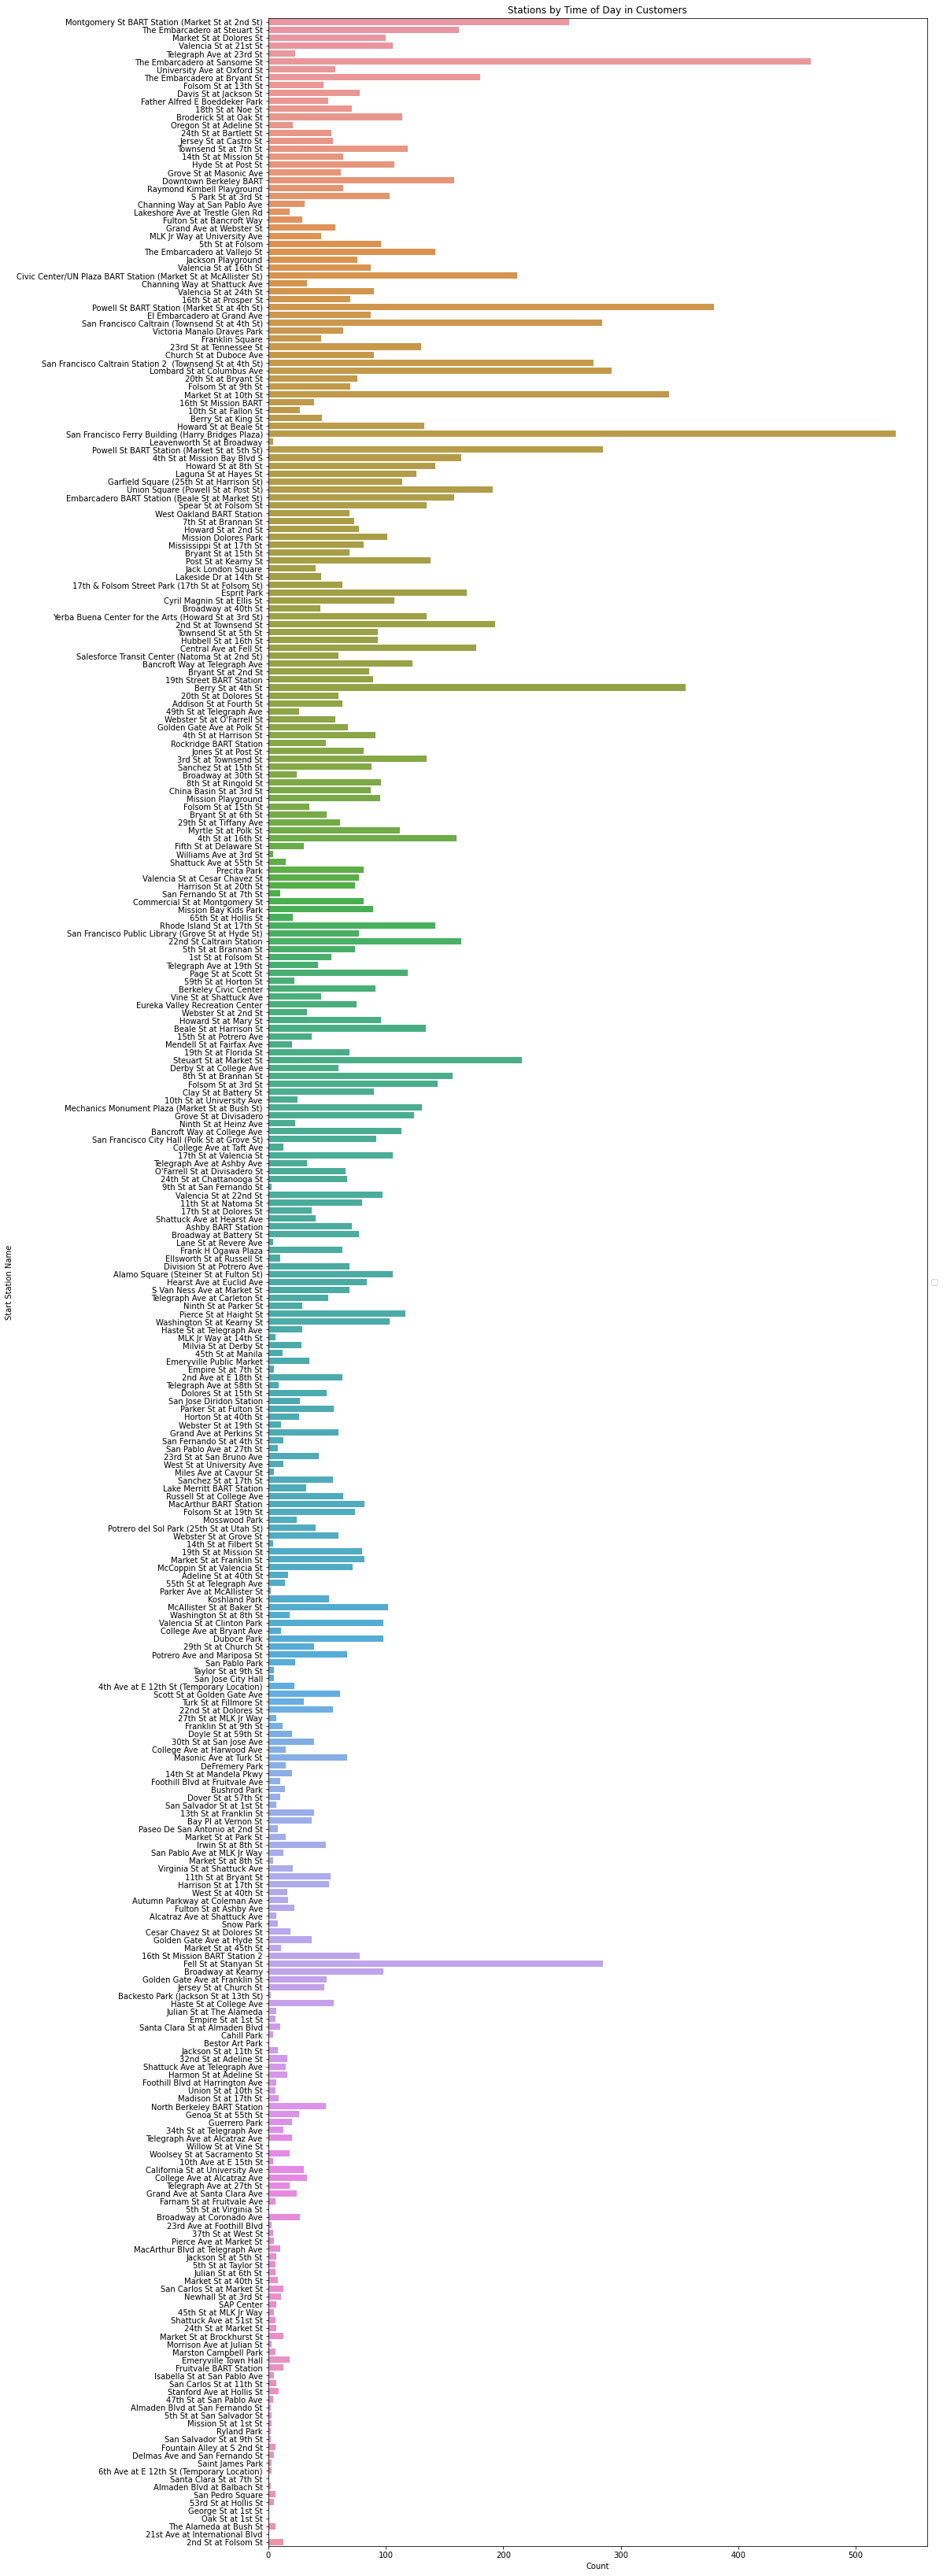

In [17]:
plt.figure(figsize = [15, 130])
ax = plt.subplot(211)
sb.countplot(data=df_cust, y='start_station_name')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.gca().set(title='Stations by Time of Day in Customers', xlabel='Count', ylabel='Start Station Name');

No handles with labels found to put in legend.


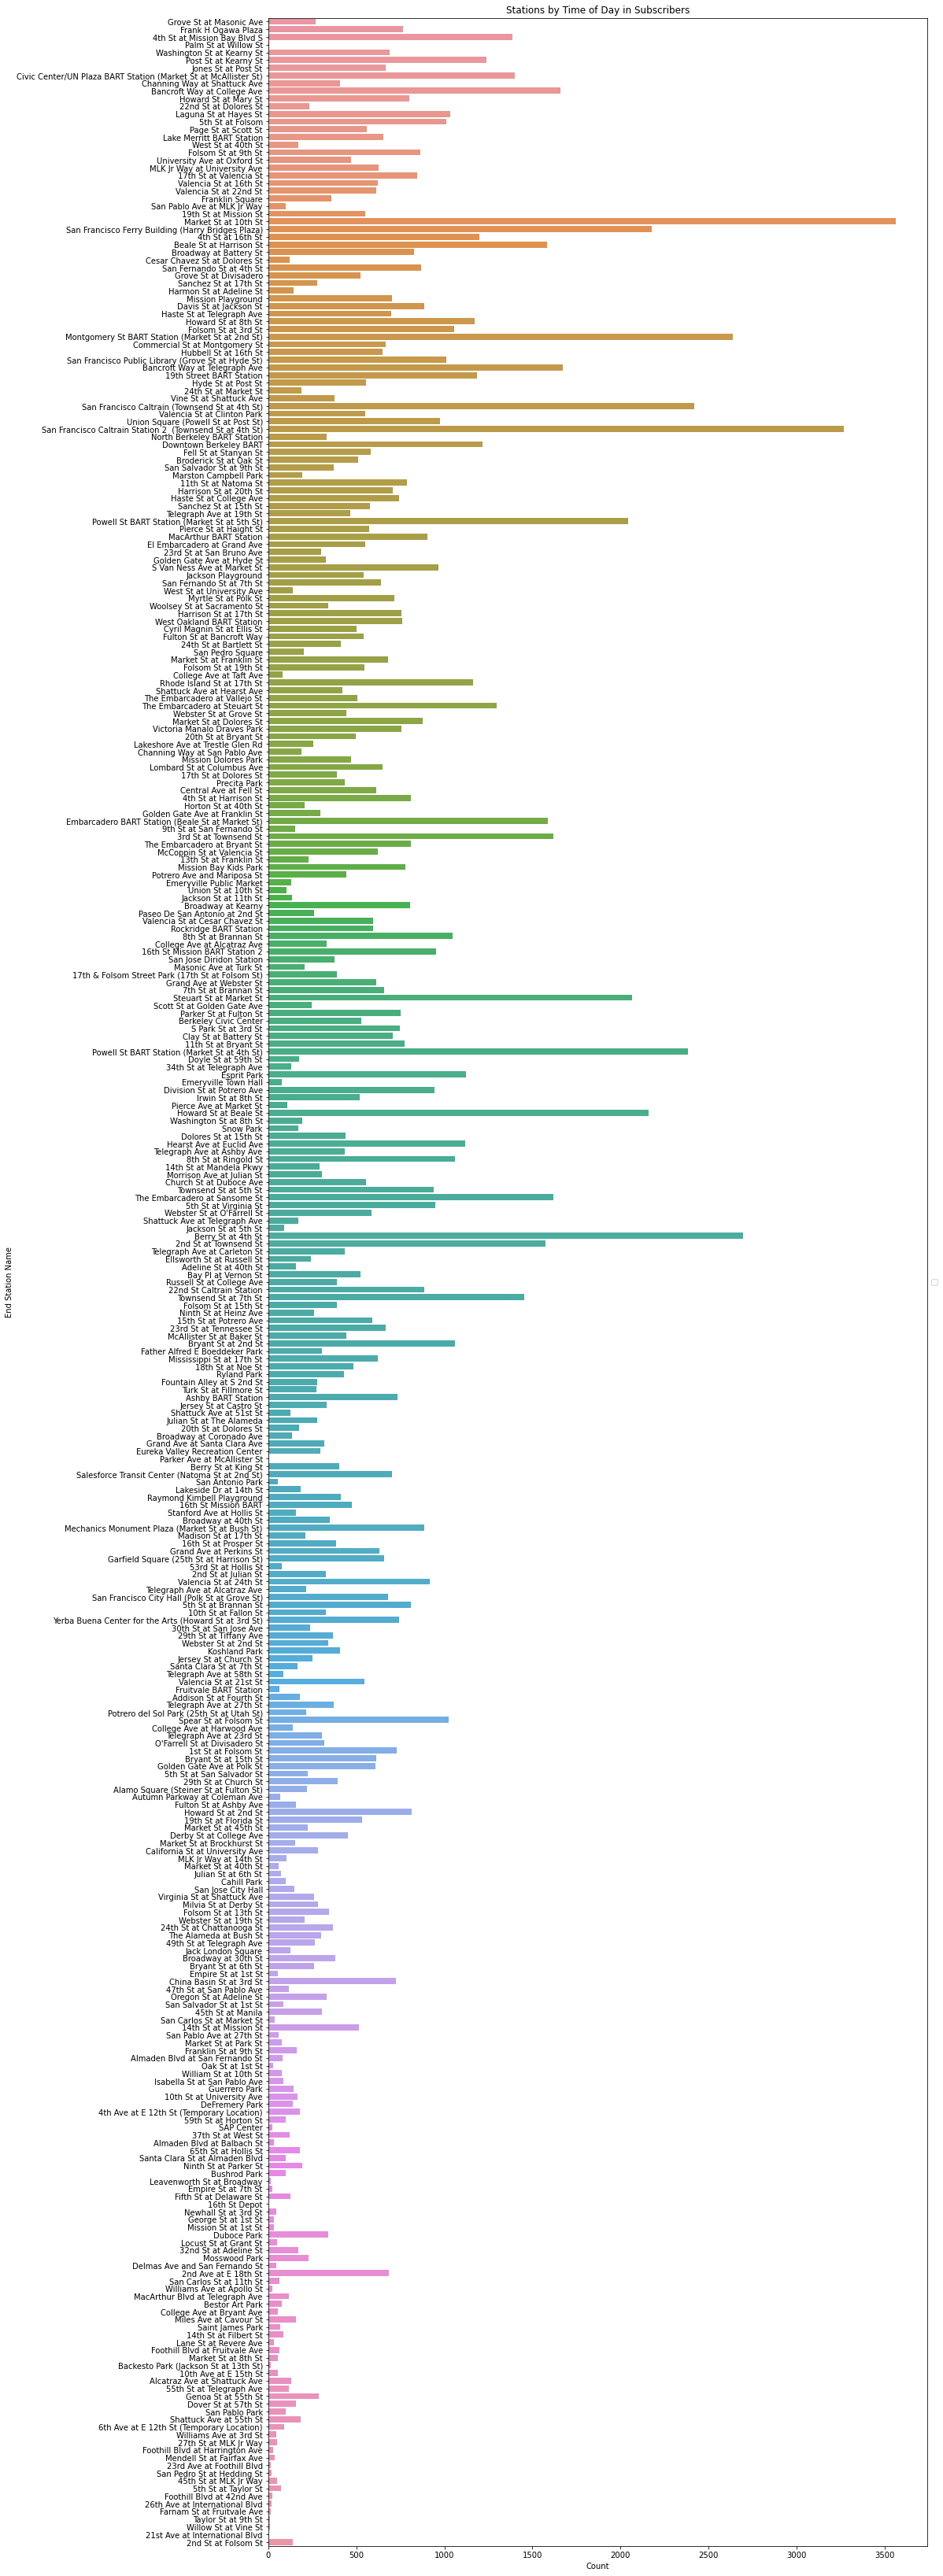

In [18]:
plt.figure(figsize = [15, 130])
ax = plt.subplot(212)
sb.countplot(data=df_sub, y='start_station_name')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.gca().set(title='Stations by Time of Day in Subscribers', xlabel='Count', ylabel='End Station Name');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> this features tell our the relation between age and duration_sec

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> the average of type of gender in bike id that them use is close

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

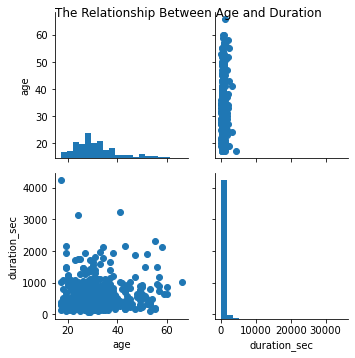

In [11]:
samples = np.random.choice(df.shape[0], 500, replace = False)
df_ = df.loc[samples,:]

g = sb.PairGrid(data = df_, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter)
g.fig.suptitle('The Relationship Between Age and Duration');

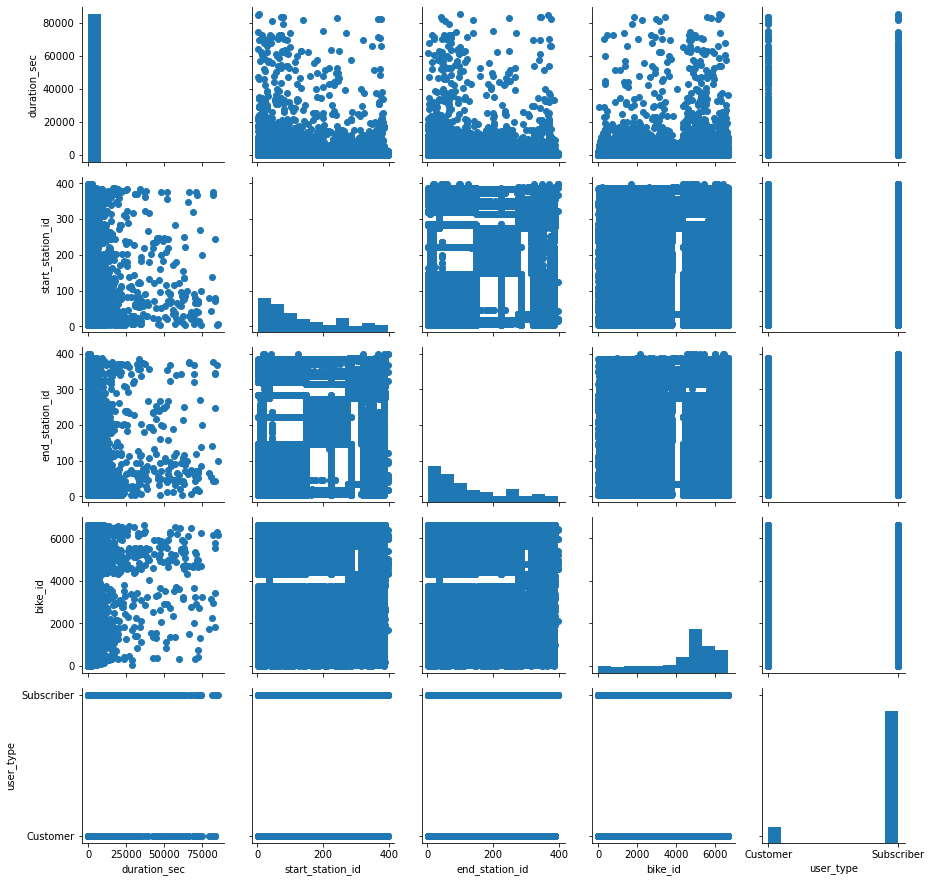

In [19]:
g = sb.PairGrid(data = df, vars = ['duration_sec', 'start_station_id', 'end_station_id', 'bike_id', 'user_type'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> relationship between the station name and the customer type

### Were there any interesting or surprising interactions between features?

> when the short age the duration second is low

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!